# Pandas

Bibliothèque de manipulation de tableau (*dataframe*).

Très performante pour l'analyse de données.

![](https://cdn.pixabay.com/photo/2018/12/05/13/41/panda-3857754_960_720.jpg)
## Chargement du module

In [1]:
import pandas as pd

## Créer des données

On utilise aussi le module Numpy pour créer des données.

In [2]:
import numpy as np

Par lignes :

In [3]:
df = pd.DataFrame(columns=["a", "b", "c", "d"],
                  index=["chat", "singe", "souris"],
                  data=[np.arange(10, 14),
                        np.arange(20, 24),
                        np.arange(30, 34)])

In [4]:
df

,a,b,c,d
chat,10,11,12,13
singe,20,21,22,23
souris,30,31,32,33


Par colonnes :

In [5]:
data = {"a": np.arange(10, 40, 10),
        "b": np.arange(11, 40, 10),
        "c": np.arange(12, 40, 10),
        "d": np.arange(13, 40, 10)}

df = pd.DataFrame(data)

df.index = ["chat", "singe", "souris"]

df

,a,b,c,d
chat,10,11,12,13
singe,20,21,22,23
souris,30,31,32,33


## Charger un jeu de données existant

On télécharge le jeu de données avec la commande Unix `wget` :

In [6]:
!wget https://python.sdv.univ-paris-diderot.fr/data-files/people.tsv

--2021-03-30 09:21:17--  https://python.sdv.univ-paris-diderot.fr/data-files/people.tsv
Résolution de python.sdv.univ-paris-diderot.fr (python.sdv.univ-paris-diderot.fr)… 194.254.61.54, 2001:660:3301:8003::54
Connexion à python.sdv.univ-paris-diderot.fr (python.sdv.univ-paris-diderot.fr)|194.254.61.54|:443… connecté.
requête HTTP transmise, en attente de la réponse… 200 OK
Taille : 253 [text/tab-separated-values]
Enregistre : «people.tsv»

people.tsv          100%[===================>]     253  --.-KB/s    ds 0s      

2021-03-30 09:21:18 (28,0 MB/s) - «people.tsv» enregistré [253/253]



Chargement du jeu de données avec la fonction `.read_csv()` :

In [7]:
people = pd.read_csv("people.tsv", sep="\t")

In [8]:
people

,name,sex,size,age
0,simon,male,175,33
1,clara,female,167,45
2,serge,male,181,44
3,claire,female,174,31
4,patrick,male,172,52
5,julie,female,168,37
6,paul,male,185,29
7,jeanne,female,172,56
8,baptiste,male,178,39
9,mathilde,female,168,46


On souhaite plutôt que la colonne `name` soit utilisé comme index :

In [9]:
people = pd.read_csv("people.tsv", sep="\t", index_col="name")

In [10]:
people

,sex,size,age
name,,,
simon,male,175,33
clara,female,167,45
serge,male,181,44
claire,female,174,31
patrick,male,172,52
julie,female,168,37
paul,male,185,29
jeanne,female,172,56
baptiste,male,178,39


## Exploration des données

Plusieurs attributs et méthodes permettent d'explorer le jeu de données.

Les 5 premières lignes :

In [11]:
people.head()

,sex,size,age
name,,,
simon,male,175,33
clara,female,167,45
serge,male,181,44
claire,female,174,31
patrick,male,172,52


Les 3 premières lignes :

In [12]:
people.head(3)

,sex,size,age
name,,,
simon,male,175,33
clara,female,167,45
serge,male,181,44


Les 5 dernières lignes :

In [13]:
people.tail()

,sex,size,age
name,,,
jeanne,female,172,56
baptiste,male,178,39
mathilde,female,168,46
bob,male,186,33
elise,female,159,63


La taille du jeu de données (nombre de lignes et de colonnes) :

In [14]:
people.shape

(12, 3)

Ce jeu de données contient 12 lignes et 3 colonnes. Si vous ouvrez le fichier correspondant (`people.tsv`) dans Jupyter Lab ou avec Excel, vous trouverez 12 lignes mais 4 colonnes. La première colonne est utilisée comme index du *dataframe* donc n'entre plus en compte dans le nombre de colonnes.

On peut afficher le type de données pour chaque colonne :

In [15]:
people.dtypes

sex     object
size     int64
age      int64
dtype: object

Le type `object` est un type générique non-numérique, qui correspond ici à des chaînes de caractères.

La méthode `.info()` affiche aussi les types de données pour chaque colonne, le nombre de valeurs et l'espace mémoire occupé par le *dataframe* :

In [16]:
people.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, simon to elise
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     12 non-null     object
 1   size    12 non-null     int64 
 2   age     12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6 KB


Enfin, la méthode `.describe()` affiche quelques statistiques, mais pour les colonnes numériques uniquement :

In [17]:
people.describe()

,size,age
count,12.000000,12.000000
mean,173.750000,42.333333
std,7.886986,10.662878
min,159.000000,29.000000
25%,168.000000,33.000000
50%,173.000000,41.500000
75%,178.750000,47.500000
max,186.000000,63.000000


## Analyse des données

### Affichez la taille des participants

In [18]:
people["size"]

name
simon       175
clara       167
serge       181
claire      174
patrick     172
julie       168
paul        185
jeanne      172
baptiste    178
mathilde    168
bob         186
elise       159
Name: size, dtype: int64

### Affichez toutes les infos sur Claire

Pour sélectionner une ou plusieurs lignes (ici `claire`), il faut utiliser l'opérateur `.loc` :

In [19]:
people.loc["claire"]

sex     female
size       174
age         31
Name: claire, dtype: object

### Déterminez la taille de Claire

In [20]:
people.loc["claire", "size"]

174

On peut aussi écrire :

In [21]:
people.loc["claire"]["size"]

174

La première écriture `people.loc["claire", "size"]` est cependant plus compacte.

### Déterminez l'âge de Baptiste.

In [22]:
people.loc["baptiste", "age"]

39

### Affichez, en une seule commande, l'âge de Paul et Bob.

In [23]:
people.loc[["paul", "bob"], "age"]

name
paul    29
bob     33
Name: age, dtype: int64

Les deux lignes sont indiquées ici sous forme d'une liste.

### Déterminez la moyenne et la valeur minimale de la taille et l'âge des individus.

Toujours avec une liste de noms de colonnes, on peut sélectionner plusieurs listes :

In [24]:
people[["size", "age"]].mean()

size    173.750000
age      42.333333
dtype: float64

In [25]:
people[["size", "age"]].min()

size    159
age      29
dtype: int64

### Comptez ensuite le nombre de personnes de chaque sexe.

On utilise ici la méthode `.value_counts()` :

In [26]:
people["sex"].value_counts()

female    6
male      6
Name: sex, dtype: int64

Le jeu de données comprend donc 6 femmes et 6 hommes.

### Déterminez, la taille et l'âge moyen chez les hommes et les femmes. 

Utilisez pour cela la méthode `.groupby()`.

In [27]:
people.groupby("sex")[["size", "age"]].mean()

,size,age
sex,,
female,168.0,46.333333
male,179.5,38.333333


On spécifie d'abord sur quelle colonne faire le regroupement `.groupby("sex")`, puis on sélectionne les colonnes qui nous intéresse `[["size", "age"]]` et enfin on calcule la moyenne avec `.mean()`

### Déterminez combien de d'individus mesurent plus de 1,80 m

On peut d'abord exécuter la condition qui renvoie un résultat bouléen (`True` ou `False`) :

In [28]:
people["size"] > 180

name
simon       False
clara       False
serge        True
claire      False
patrick     False
julie       False
paul         True
jeanne      False
baptiste    False
mathilde    False
bob          True
elise       False
Name: size, dtype: bool

Ce résultat n'est pas très pratique car on souhaite afficher uniquement les individus de plus de 1,80 m.

On peut utiliser cette condition directement dans l'appel du *dataframe* :

In [29]:
people[ people["size"] > 180 ]

,sex,size,age
name,,,
serge,male,181,44
paul,male,185,29
bob,male,186,33


### Quelle femme a moins de 35 ans ?

On peut combiner deux conditions :

In [30]:
(people["sex"] == "female") & (people["age"] < 35)

name
simon       False
clara       False
serge       False
claire       True
patrick     False
julie       False
paul        False
jeanne      False
baptiste    False
mathilde    False
bob         False
elise       False
dtype: bool

Et afficher uniquement les individus qui répondent aux deux conditions : 

In [31]:
people[ (people["sex"] == "female") & (people["age"] < 35) ]

,sex,size,age
name,,,
claire,female,174,31


### Déterminez l'âge moyen des individus qui mesurent plus de 1,80 m.

On sélectionne d'abord les individus qui mesurent plus de 1,80 m :

In [32]:
people[ people["size"] > 180 ]

,sex,size,age
name,,,
serge,male,181,44
paul,male,185,29
bob,male,186,33


Puis on sélectionne l'âge et calcule la moyenne :

In [33]:
people[ people["size"] > 180 ]["age"].mean()

35.333333333333336

### Déterminez la taille maximale des femmes qui ont plus de 35 ans.

In [34]:
people[ (people["sex"] == "female") & (people["age"] > 35)  ]["size"].max()

172

## Des graphiques

In [35]:
import matplotlib.pyplot as plt

%matplotlib inline

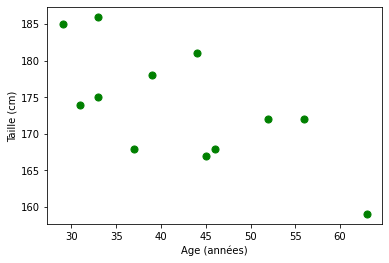

In [36]:
plt.scatter(people["age"], people["size"], color="green", marker="o", s=50)
plt.xlabel("Age (années)")
plt.ylabel("Taille (cm)");

In [37]:
people.groupby("sex").mean()

,size,age
sex,,
female,168.0,46.333333
male,179.5,38.333333


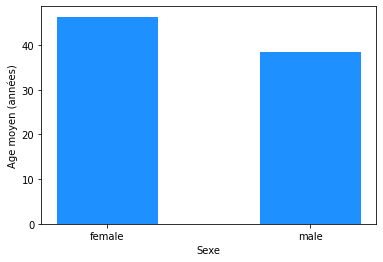

In [38]:
plt.bar(people.groupby("sex").mean().index, 
        people.groupby("sex").mean()["age"].values,
        width=0.5, color="dodgerblue")
plt.xlabel("Sexe")
plt.ylabel("Age moyen (années)");

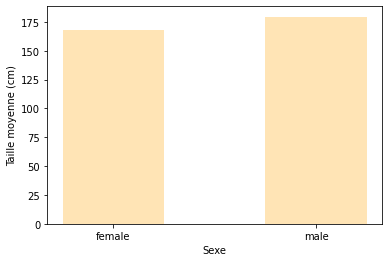

In [39]:
plt.bar(people.groupby("sex").mean().index, 
        people.groupby("sex").mean()["size"].values,
        width=0.5, color="moccasin")
plt.xlabel("Sexe")
plt.ylabel("Taille moyenne (cm)");